In [598]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import hvplot.pandas

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression # Librería para Regresión Lineal
from sklearn.metrics import classification_report#, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [599]:
#Leer los datos del archivo CSV
df = pd.read_csv('Car details v3.csv')

In [600]:
df.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [601]:
df = df.drop ('name', axis = 1)
df = df.drop ('fuel', axis = 1)
df = df.drop ('mileage', axis = 1)
df = df.drop ('max_power', axis = 1)
df = df.drop ('torque', axis = 1)

In [602]:
# Remover los caracteres ' CC' de la columna 'engine' para poder usar los valores como datos numéricos
df['engine'] = df['engine'].str.replace(' CC', '', regex=False)

In [603]:
# Verificamos que queden solo los números
df['engine']

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: engine, Length: 8128, dtype: object

In [604]:
# Revisión de valores con 0
print("Cantidad de registros 0 en year: ",df['year'].isin([0]).sum())
print("Cantidad de registros 0 en selling_price: ",df['selling_price'].isin([0]).sum())
print("Cantidad de registros 0 en km_driven: ",df['km_driven'].isin([0]).sum())
print("Cantidad de registros 0 en seller_type: ",df['seller_type'].isin([0]).sum())
print("Cantidad de registros 0 en transmission: ",df['transmission'].isin([0]).sum())
print("Cantidad de registros 0 en owner: ",df['owner'].isin([0]).sum())
print("Cantidad de registros 0 en engine: ",df['engine'].isin([0]).sum())
print("Cantidad de registros 0 en seats: ",df['seats'].isin([0]).sum())

Cantidad de registros 0 en year:  0
Cantidad de registros 0 en selling_price:  0
Cantidad de registros 0 en km_driven:  0
Cantidad de registros 0 en seller_type:  0
Cantidad de registros 0 en transmission:  0
Cantidad de registros 0 en owner:  0
Cantidad de registros 0 en engine:  0
Cantidad de registros 0 en seats:  0


In [605]:
# Revisión de valores con NULL
print("Cantidad de registros NULL en year: ",df['year'].isnull().sum())
print("Cantidad de registros NULL en selling_price: ",df['selling_price'].isnull().sum())
print("Cantidad de registros NULL en km_driven: ",df['km_driven'].isnull().sum())
print("Cantidad de registros NULL en seller_type: ",df['seller_type'].isnull().sum())
print("Cantidad de registros NULL en transmission: ",df['transmission'].isnull().sum())
print("Cantidad de registros NULL en owner: ",df['owner'].isnull().sum())
print("Cantidad de registros NULL en engine: ",df['engine'].isnull().sum())
print("Cantidad de registros NULL en seats: ",df['seats'].isnull().sum())

Cantidad de registros NULL en year:  0
Cantidad de registros NULL en selling_price:  0
Cantidad de registros NULL en km_driven:  0
Cantidad de registros NULL en seller_type:  0
Cantidad de registros NULL en transmission:  0
Cantidad de registros NULL en owner:  0
Cantidad de registros NULL en engine:  221
Cantidad de registros NULL en seats:  221


In [606]:
print(df[df['engine'].isnull()])

      year  selling_price  km_driven seller_type transmission         owner  \
13    2007         200000      80000  Individual       Manual  Second Owner   
31    2003          70000      50000  Individual       Manual  Second Owner   
78    2003          50000      70000  Individual       Manual   First Owner   
87    2015         475000      78000      Dealer       Manual   First Owner   
119   2010         300000     120000  Individual       Manual  Second Owner   
...    ...            ...        ...         ...          ...           ...   
7846  2000         200000     100000  Individual       Manual   First Owner   
7996  2000         140000      50000  Individual       Manual  Second Owner   
8009  2006         145000      80000  Individual       Manual  Second Owner   
8068  2017         580000     165000  Individual       Manual   First Owner   
8103  2006         130000     100000  Individual       Manual  Second Owner   

     engine  seats  
13      NaN    NaN  
31      N

In [607]:
#Rellenar los valores vacíos con 0 para poder convertir la columna en datos de tipo int
df['engine'] = pd.to_numeric(df['engine'], errors='coerce').fillna(0).astype(int)
df['seats'] = pd.to_numeric(df['seats'], errors='coerce').fillna(0).astype(int)

In [608]:
#Convertimos los valores de las columnas en tipo int
df['engine']=df['engine'].astype('int')
df['seats']=df['seats'].astype('int')

In [609]:
# Reemplazando valores vacíos por la media de la columna enngine
df['engine']=df['engine'].replace(np.nan,df['engine'].mean())

# Reemplazando valores vacíos por la media de la columna seats
df['seats']=df['seats'].replace(np.nan,df['seats'].mean())

In [610]:
# Verificamos que no queden valores null en la columna engine
print(df[df['engine'].isnull()])

Empty DataFrame
Columns: [year, selling_price, km_driven, seller_type, transmission, owner, engine, seats]
Index: []


In [611]:
# Verificamos que no queden valores null en la columna seats
print(df[df['seats'].isnull()])

Empty DataFrame
Columns: [year, selling_price, km_driven, seller_type, transmission, owner, engine, seats]
Index: []


In [612]:
#Identificar posibles valores de la columna onwer (propietario)
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [613]:
#Identificar posibles valores de la columna seller_type (tipo de vendedor)
df['seller_type'].unique()


array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [614]:
#Identificar posibles valores de la columna transmission (transmisión)
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [615]:
#Reemplazar Strigs por números enteros
#Columna owner
df.loc[df['owner'] == "First Owner", 'owner'] = 1
df.loc[df['owner'] == "Second Owner", 'owner'] = 2
df.loc[df['owner'] == "Third Owner", 'owner'] = 3
df.loc[df['owner'] == "Fourth & Above Owner", 'owner'] = 4
df.loc[df['owner'] == "Test Drive Car", 'owner'] = 5

#Columna seller_type
df.loc[df['seller_type'] == "Individual", 'seller_type'] = 1
df.loc[df['seller_type'] == "Dealer", 'seller_type'] = 2
df.loc[df['seller_type'] == "Trustmark Dealer", 'seller_type'] = 3

#Columna transmission
df.loc[df['transmission'] == "Manual", 'transmission'] = 1
df.loc[df['transmission'] == "Automatic", 'transmission'] = 2
df

,year,selling_price,km_driven,seller_type,transmission,owner,engine,seats
0,2014,450000,145500,1,1,1,1248,5
1,2014,370000,120000,1,1,2,1498,5
2,2006,158000,140000,1,1,3,1497,5
3,2010,225000,127000,1,1,1,1396,5
4,2007,130000,120000,1,1,1,1298,5
...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,1,1,1,1197,5
8124,2007,135000,119000,1,1,4,1493,5
8125,2009,382000,120000,1,1,1,1248,5
8126,2013,290000,25000,1,1,1,1396,5


In [617]:
#Convertir la columnas tipo String en tipo int
df['owner']=df['owner'].astype('int')
df['seller_type']=df['seller_type'].astype('int')
df['transmission']=df['transmission'].astype('int')
#df['engine']=df['engine'].astype(int)
#df['seats']=df['seats'].astype(int)

In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           8128 non-null   int64
 1   selling_price  8128 non-null   int64
 2   km_driven      8128 non-null   int64
 3   seller_type    8128 non-null   int32
 4   transmission   8128 non-null   int32
 5   owner          8128 non-null   int32
 6   engine         8128 non-null   int32
 7   seats          8128 non-null   int32
dtypes: int32(5), int64(3)
memory usage: 349.4 KB


In [619]:
df.describe()

,year,selling_price,km_driven,seller_type,transmission,owner,engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,1.196604,1.129183,1.462229,1418.965059,5.269439
std,4.044249,8.062534e+05,5.655055e+04,0.464810,0.335423,0.721824,550.735342,1.293039
min,1983.000000,2.999900e+04,1.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2011.000000,2.549990e+05,3.500000e+04,1.000000,1.000000,1.000000,1196.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,1.000000,1.000000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,1.000000,1.000000,2.000000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,3.000000,2.000000,5.000000,3604.000000,14.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

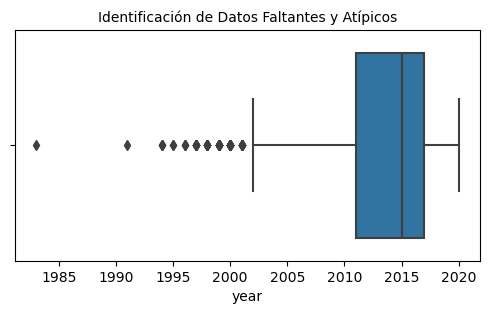

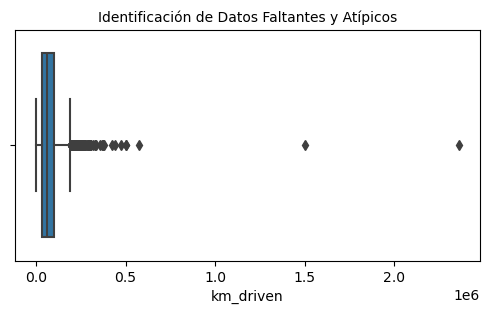

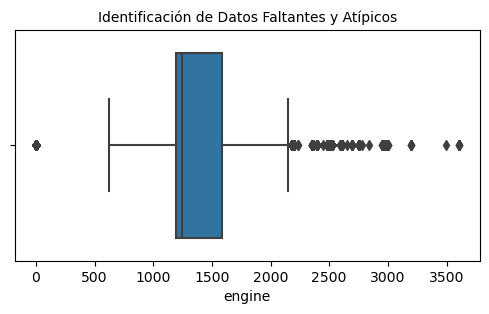

In [620]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=df['year'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=df['km_driven'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=df['engine'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [621]:
#Conteo de Datos Atípicos para owner

nivel_minimo=1
nivel_maximo=4
Total_Atipicos=((df['owner']<nivel_minimo)|(df['owner']>nivel_maximo)).sum()
print("El total de datos atípicos para la columna 'owner' es {}".format(Total_Atipicos))

El total de datos atípicos para la columna 'owner' es 5


In [622]:
# Filtra Datos Atípicos para owner

df=df[(df['owner']<nivel_maximo)&(df['owner']>nivel_minimo)]

In [623]:
#Conteo de Datos Atípicos

nivel_minimo=1
nivel_maximo=4
Total_Atipicos=((df['owner']<nivel_minimo)|(df['owner']>nivel_maximo)).sum()
print("El total de datos atípicos para la columna 'owner' es {}".format(Total_Atipicos))

El total de datos atípicos para la columna 'owner' es 0


In [624]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2660 entries, 1 to 8122
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           2660 non-null   int64
 1   selling_price  2660 non-null   int64
 2   km_driven      2660 non-null   int64
 3   seller_type    2660 non-null   int32
 4   transmission   2660 non-null   int32
 5   owner          2660 non-null   int32
 6   engine         2660 non-null   int32
 7   seats          2660 non-null   int32
dtypes: int32(5), int64(3)
memory usage: 135.1 KB


In [626]:
# Revisión de datos con 0
print("Cantidad de Registros con cero en year: ",df['year'].isin([0]).sum())
print("Cantidad de Registros con cero en km_driven: ",df['km_driven'].isin([0]).sum())
print("Cantidad de Registros con cero en seller_type: ",df['seller_type'].isin([0]).sum())
print("Cantidad de Registros con cero en transmission: ",df['transmission'].isin([0]).sum())
print("Cantidad de Registros con cero en owner: ",df['owner'].isin([0]).sum())
print("Cantidad de Registros con cero en engine: ",df['engine'].isin([0]).sum())
print("Cantidad de Registros con cero en seats: ",df['seats'].isin([0]).sum())

Cantidad de Registros con cero en year:  0
Cantidad de Registros con cero en km_driven:  0
Cantidad de Registros con cero en seller_type:  0
Cantidad de Registros con cero en transmission:  0
Cantidad de Registros con cero en owner:  0
Cantidad de Registros con cero en engine:  133
Cantidad de Registros con cero en seats:  133


In [627]:
#Revisión de datos faltantes

print("Cantidad de Registros vacíos en year: ", df['year'].isnull().sum())
print("Cantidad de Registros vacíos en km_driven: ", df['km_driven'].isnull().sum())
print("Cantidad de Registros vacíos en seller_type: ", df['seller_type'].isnull().sum())
print("Cantidad de Registros vacíos en transmission: ", df['transmission'].isnull().sum())
print("Cantidad de Registros vacíos en owner: ",df['owner'].isnull().sum())
print("Cantidad de Registros vacíos en seats: ", df['seats'].isnull().sum())

Cantidad de Registros vacíos en year:  0
Cantidad de Registros vacíos en km_driven:  0
Cantidad de Registros vacíos en seller_type:  0
Cantidad de Registros vacíos en transmission:  0
Cantidad de Registros vacíos en owner:  0
Cantidad de Registros vacíos en seats:  0


In [628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2660 entries, 1 to 8122
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           2660 non-null   int64
 1   selling_price  2660 non-null   int64
 2   km_driven      2660 non-null   int64
 3   seller_type    2660 non-null   int32
 4   transmission   2660 non-null   int32
 5   owner          2660 non-null   int32
 6   engine         2660 non-null   int32
 7   seats          2660 non-null   int32
dtypes: int32(5), int64(3)
memory usage: 135.1 KB


In [629]:
# Total de autos vendidos según su precio

df['selling_price'].value_counts()

selling_price
300000     88
350000     86
250000     85
150000     77
200000     74
           ..
1151000     1
501000      1
2150000     1
1190000     1
307000      1
Name: count, Length: 347, dtype: int64

In [630]:
df['selling_price'].head(50)

1       370000
2       158000
7        45000
10      500000
11       92000
12      280000
13      200000
14      180000
16      778000
17      500000
18      150000
20      174000
31       70000
32      150000
35      330000
39      425000
49     1450000
55     1650000
57     1750000
62      190000
64      630000
65      600000
73      235000
75     1700000
76      450000
77      450000
82     2500000
92      351000
93      535000
98      120000
100     185000
101     200000
103     270000
105     625000
106     400000
112     522000
114     300000
119     300000
120     400000
125     360000
127     625000
128     135000
129     700000
149     975000
163    1525000
171     300000
175     390000
176     550000
177      40000
181     400000
Name: selling_price, dtype: int64

In [631]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = df.drop('selling_price',axis=1) # Se cargan los datos de train sin los datos de la columna selling_price
Y = df['selling_price'] # Se cargan los datos de train con los datos de la columna selling_price

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)

In [632]:
print (X_train)

      year  km_driven  seller_type  transmission  owner  engine  seats
1742  2008      80000            1             1      2     796      5
5809  2013     100000            1             1      2    2494      7
3564  2018      15000            1             1      2    2498      6
2786  2015     120000            1             1      2    1405      5
8037  2012      90000            1             1      3    1405      5
...    ...        ...          ...           ...    ...     ...    ...
5394  2012      96000            2             2      2    1998      5
2325  2020     120000            1             1      2     998      5
2511  2014      50000            1             1      2    1197      5
5145  2006     120000            1             1      2    1497      5
7996  2000      50000            1             1      2       0      0

[1995 rows x 7 columns]


In [633]:
print (Y_train)

1742    110000
5809    625000
3564    850000
2786    229999
8037    175000
         ...  
5394    925000
2325    250000
2511    380000
5145    180000
7996    140000
Name: selling_price, Length: 1995, dtype: int64


In [634]:
X_train.shape

(1995, 7)

In [635]:
X_test.shape

(665, 7)

In [636]:
model = LinearRegression()

In [637]:
model.fit(X_train, Y_train)

LinearRegression()

In [638]:
model.coef_

array([ 3.38412132e+04, -2.89754718e-01,  8.66385152e+04,  4.15733014e+05,
       -1.36780001e+04,  2.97309769e+02, -5.68947972e+04])

In [639]:
pd.DataFrame(model.coef_, X.columns, columns=['Coedicients'])

,Coedicients
year,33841.213154
km_driven,-0.289755
seller_type,86638.515194
transmission,415733.013963
owner,-13678.000084
engine,297.309769
seats,-56894.797203


In [640]:
Y_pred = model.predict(X_test)

In [641]:
MAE= metrics.mean_absolute_error(Y_test, Y_pred)
MSE=metrics.mean_squared_error(Y_test, Y_pred)
RMSE= np.sqrt(MSE)

In [642]:
MAE

135978.09950038465

In [643]:
MSE

42850343367.714355

In [644]:
RMSE

207003.2448241195

In [645]:
r2 = r2_score(Y_test, Y_pred)

In [648]:
r2

0.5660368800897334

Text(0, 0.5, 'y_pred')

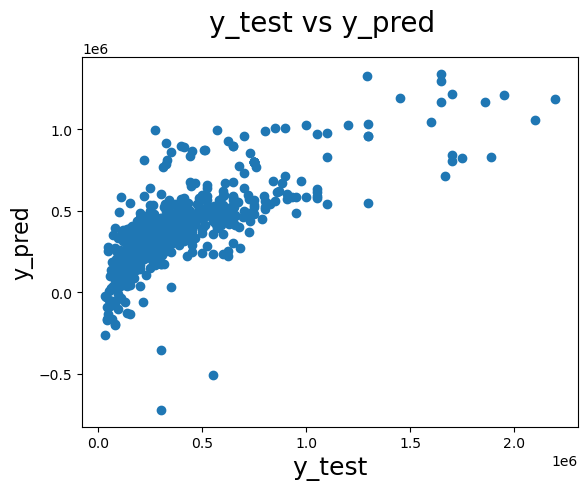

In [649]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_test,Y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [650]:
print(f"La ecuación de la recta es: y = {model.intercept_} + {model.coef_[0]}*x")

La ecuación de la recta es: y = -68288407.92059591 + 33841.21315423288*x


In [651]:
test_residual = Y_test - Y_pred

In [652]:
pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

C:\Users\Sergio Pérez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


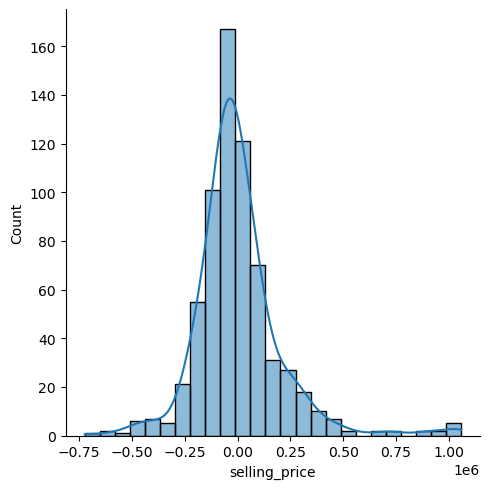

In [653]:
sns.displot(test_residual, bins=25, kde=True)

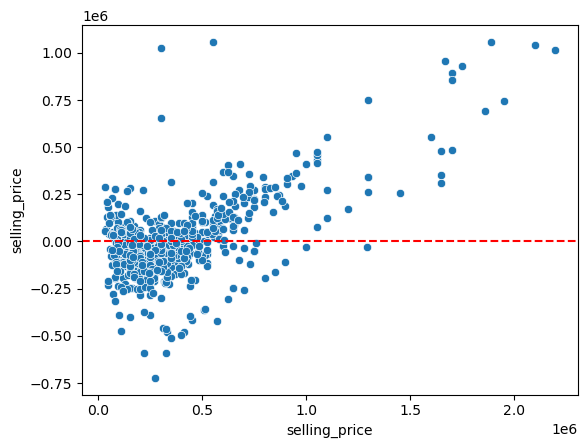

In [654]:
sns.scatterplot(x=Y_test, y=test_residual)

plt.axhline(y=0, color='r', ls='--')